#### Configuração do seu ambiente

- Crie um ambiente virtual python: python3 -m venv venv
- Ative o seu ambiente virtual: source venv/bin/activate
- Instale as dependências usando o 'requirements.txt' deste repositório: pip install -r requirements.txt
- Crie um kernel no seu jupyter notebook com o seu novo ambiente. Para isso:
    - Com o jupyter notebook aberto clique em "Select Kernel" no canto superior direito
    - Crie um novo kernel usando um ambiente python existente, neste caso o que você acabou de criar

#### Descrição da atividade

Você tem acesso a uma base de dados chamada "fashion_mnist". Essa base de dados possui várias imagens, já processadas e em formato de matriz, de roupas de vários estilos classificadas de acordo com as seguintes classes:

0. T-shirt/top (camiseta)

1. Trouser (calça)

2. Pullover (suéter)

3. Dress (vestido)

4. Coat (casaco)

5. Sandal (sandália)

6. Shirt (camisa)

7. Sneaker (tênis)

8. Bag (bolsa)

9. Ankle boot (bota de cano curto)

O frio está passando e você deve criar uma CNN com keras para identificar roupas adequadas para o verão. Portanto, podemos transformar esse problema em uma classificação binária: 0 - Frio, 1 - Calor. Organize os dados e crie uma rede que consiga realizar essa classificação.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
## Carregar dados
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

2025-08-16 22:03:52.811973: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-16 22:03:57.505441: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-16 22:03:59.316916: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755381842.607856   35244 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755381843.380230   35244 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755381850.218010   35244 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
## Dados já estão em formato de array
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

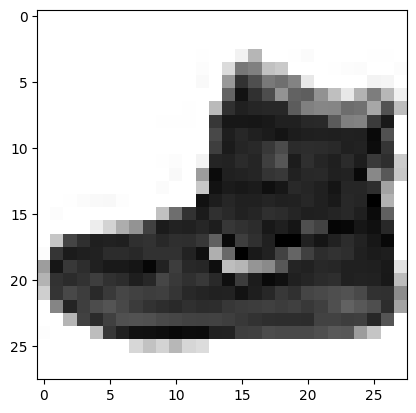

Label: 9


In [ ]:
## Visualizando imagens

imagem = x_train[0]
classe_da_imagem = y_train[0]
plt.imshow(imagem.reshape(28,28), cmap=plt.cm.binary)
plt.show()
print('Label: {}'.format(classe_da_imagem))

In [ ]:
## Normaliza para melhorar o treinamento
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

In [ ]:
## Inclui canal de cor
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

In [ ]:
## Classes
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test, num_classes)

...